This file just for test if the model works or not, not useful for the FYP

In [ ]:
!python --version

Python 3.11.11


In [ ]:
!sudo apt-get install python3.10


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.9).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10

update-alternatives: --install needs <link> <name> <path> <priority>

Use 'update-alternatives --help' for program usage information.


In [ ]:
!pip install ydata-synthetic==1.4.0

In [ ]:
# Importing the necessay modules
import pandas as pd
import matplotlib.pyplot as plt
from ydata_synthetic.synthesizers.timeseries import TimeSeriesSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters

In [ ]:
# Read the data
mba_data = pd.read_csv("dataset_10_2.csv")
numerical_cols = ["Bandwidth" ,"delay","packetloss"]
#categorical_cols = [col for col in mba_data.columns if col not in numerical_cols]

In [ ]:
# Preview the dataset
mba_data.head(10)

,Bandwidth,delay,packetloss
0,9.335823e-03,0.369863,0.0
1,6.668445e-10,0.356164,0.0
2,0.000000e+00,0.479452,0.0
3,0.000000e+00,0.328767,0.0
4,0.000000e+00,0.383562,0.0
5,7.468658e-03,0.438356,0.0
6,0.000000e+00,0.383562,0.0
7,0.000000e+00,0.438356,0.0
8,0.000000e+00,0.287671,0.0
9,0.000000e+00,0.273973,0.0


In [ ]:
# Defining model and training parameters
model_args = ModelParameters(batch_size=1000,
                             lr=0.001,
                             betas=(0.2, 0.9),
                             latent_dim=20,
                             gp_lambda=2,
                             pac=1)

train_args = TrainParameters(epochs=100000,
                             sequence_length=1000,
                             sample_length=50,
                             rounds=1,
                             measurement_cols= ["bandwidth" ,"delay","packetloss"])

In [ ]:
# Training the DoppelGANger synthesizer
model_dop_gan = TimeSeriesSynthesizer(modelname='doppelganger',model_parameters=model_args)
model_dop_gan.fit(mba_data, train_args, num_cols=numerical_cols)

/usr/local/lib/python3.11/dist-packages/ydata_synthetic/synthesizers/timeseries/doppelganger/network.py:13: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output = tf.compat.v1.layers.dense(
Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.11/dist-packages/ydata_synthetic/synthesizers/timeseries/doppelganger/network.py:274: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
100%|██████████| 100000/100000 [00:02<00:00, 45212.52it/s]


In [ ]:
# Generating new synthetic samples
synth_data = model_dop_gan.sample(n_samples=100)
synth_df = pd.concat(synth_data, axis=0)

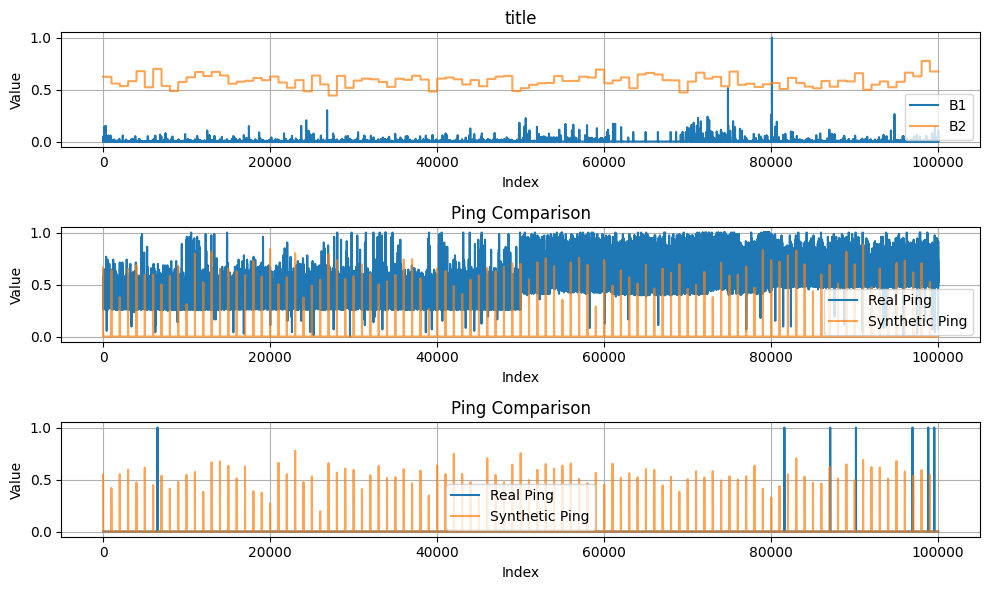

In [ ]:
# Create a plot for each measurement column
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(mba_data['Bandwidth'].reset_index(drop=True), label='B1')
plt.plot(synth_df['Bandwidth'].reset_index(drop=True), label='B2', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('title')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(mba_data['delay'].reset_index(drop=True), label='Real Ping')
plt.plot(synth_df['delay'].reset_index(drop=True), label='Synthetic Ping', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ping Comparison')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(mba_data['packetloss'].reset_index(drop=True), label='Real Ping')
plt.plot(synth_df['packetloss'].reset_index(drop=True), label='Synthetic Ping', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ping Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Divide original data into sequences
sequence_lenght = 10000
mba_sequences = []

for i in range(0, len(mba_data), sequence_lenght):
    sequence = mba_data.iloc[i:i+sequence_lenght]
    mba_sequences.append(sequence)

print(f"Number of sequences: {len(mba_sequences)}")
print(f"Size of each sequence: {mba_sequences[0].shape} (rows x columns)")

Number of sequences: 10
Size of each sequence: (10000, 3) (rows x columns)


In [ ]:
# Choose a random sequence
import numpy as np

In [ ]:
print(len(mba_sequences))
print(len(synth_data))
obs = np.random.randint(len(mba_sequences))
print(obs)

10
100
0


In [ ]:
print(obs)
obs=9

0


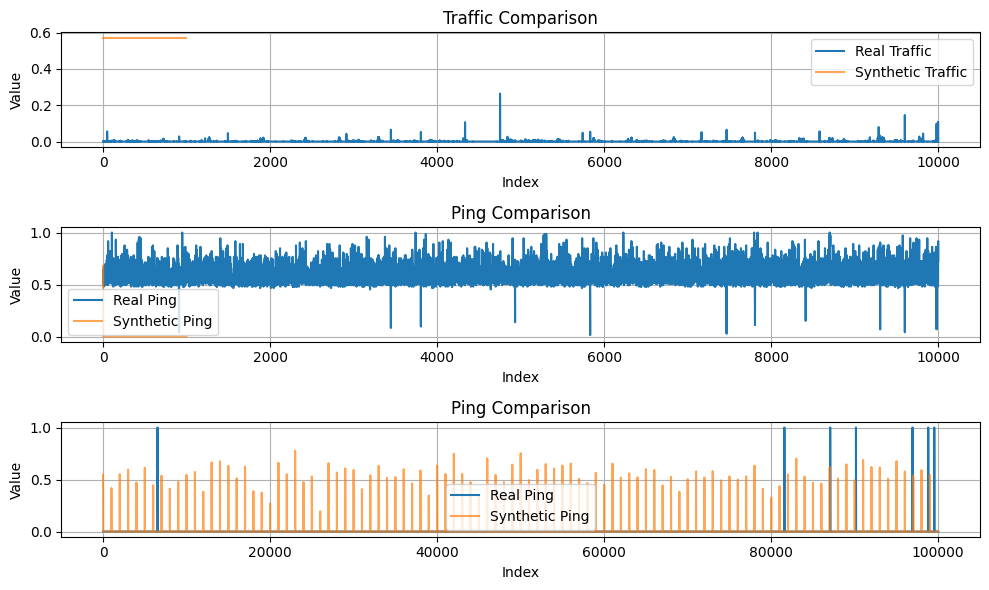

In [ ]:
# Create a plot for each measurement column
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(mba_sequences[obs]['Bandwidth'].reset_index(drop=True), label='Real Traffic')
plt.plot(synth_data[obs]['Bandwidth'].reset_index(drop=True), label='Synthetic Traffic', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Traffic Comparison')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(mba_sequences[obs]['delay'].reset_index(drop=True), label='Real Ping')
plt.plot(synth_data[obs]['delay'].reset_index(drop=True), label='Synthetic Ping', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ping Comparison')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(mba_data['packetloss'].reset_index(drop=True), label='Real Ping')
plt.plot(synth_df['packetloss'].reset_index(drop=True), label='Synthetic Ping', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ping Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
synth_df.to_csv('synthetic_mba.csv', index=False)